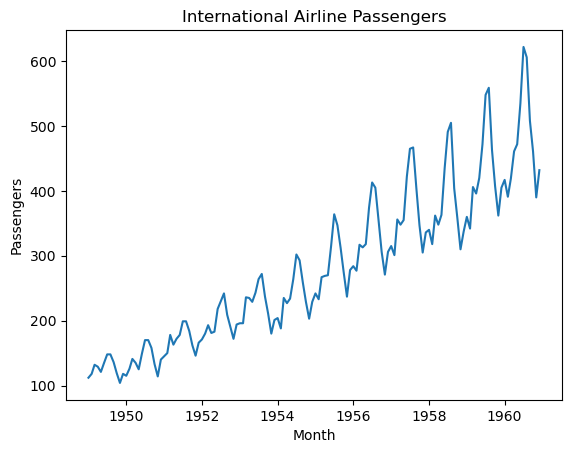

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month', dtype={
                   'Passengers': 'float64'})

# Plot the data
plt.plot(data)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('International Airline Passengers')
plt.show()

In [2]:
train_data = data[:'1959']
test_data = data['1960':]

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create and fit the SARIMA model (choose p, d, q, P, D, Q, and s parameters)
model = SARIMAX(train_data, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

c:\Users\chibi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chibi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\chibi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\chibi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chibi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum L

Mean Squared Error: 448.24644643196217


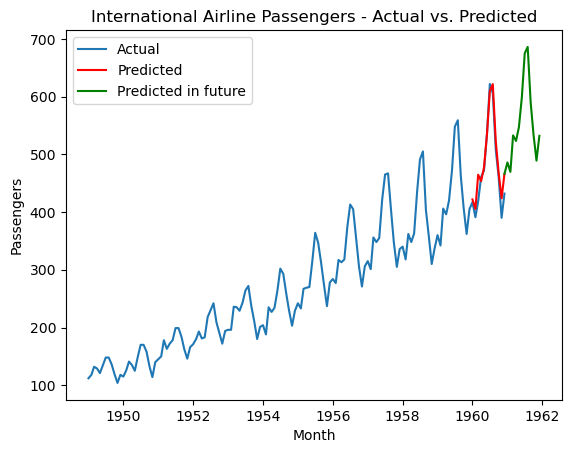

In [12]:
from sklearn.metrics import mean_squared_error

# Make predictions for the test set
predictions_to_verify = results.predict(start='1960-01-01', end='1960-12-01') # type: ignore
predictions_in_future = results.predict(start='1960-12-01', end='1961-12-01') # type: ignore

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions_to_verify)
print("Mean Squared Error:", mse)

# Plot the actual data and predictions
plt.plot(data, label='Actual')
plt.plot(predictions_to_verify, label='Predicted', color='red')
plt.plot(predictions_in_future, label='Predicted in future', color='green')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('International Airline Passengers - Actual vs. Predicted')
plt.legend()
plt.show()

In [13]:
import numpy as np

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 21.17183143783178


In [16]:
data_range = data['Passengers'].max() - data['Passengers'].min()
print("Data Range:", data_range)
percentage = (rmse / data_range) * 100
print("RMSE as a percentage of the data range: {:.2f}%".format(percentage))


Data Range: 518.0
RMSE as a percentage of the data range: 4.09%


In [17]:
# Compare the results to auto_arima

In [18]:
%pip install pmdarima

     -------------------------------------- 569.7/569.7 kB 7.2 MB/s eta 0:00:00
     ------------------------------------- 987.3/987.3 kB 10.4 MB/s eta 0:00:00


In [20]:
import pmdarima as pm

# Use auto_arima to find the best parameters
auto_model = pm.auto_arima(train_data, seasonal=True, m=12, stepwise=True)

# Print the best model's parameters
print(auto_model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 27 Mar 2023   AIC                            905.686
Time:                                    18:25:19   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095   

Mean Squared Error: 343.60067865036626


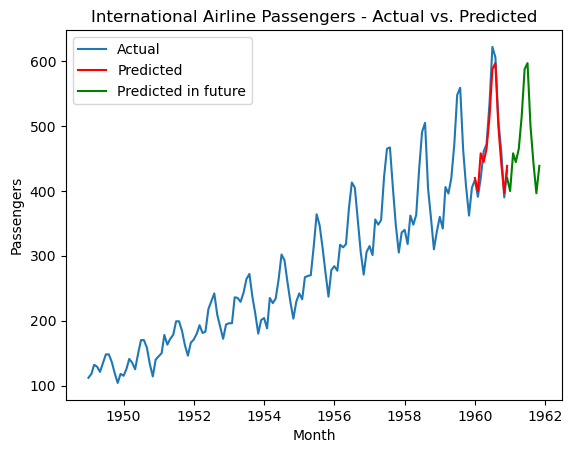

In [57]:
from dateutil.relativedelta import relativedelta

# Make predictions for the test set
predictions = auto_model.predict(n_periods=len(test_data))

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print("Mean Squared Error:", mse)


# Do custom future predictions

# Define the custom date range
start_date = '1960-12-01'
end_date = '1961-12-01'

start_date_dt = pd.to_datetime(start_date)
end_date_dt = pd.to_datetime(end_date)
date_difference = relativedelta(end_date_dt, start_date_dt)
n_periods = date_difference.years * 12 + date_difference.months

# Make predictions using the auto_model
predictions_in_future = auto_model.predict(n_periods=n_periods)

# Create a custom date index
date_index = pd.date_range(start=start_date, end=end_date, inclusive='left', freq='MS')

# Combine the predictions and the custom date index into a DataFrame
predictions_df = pd.DataFrame(predictions, index=date_index, columns=['Predicted Passengers'])

# Plot the actual data and predictions
plt.plot(data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.plot(date_index, predictions_in_future, label='Predicted in future', color='green')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('International Airline Passengers - Actual vs. Predicted')
plt.legend()
plt.show()

In [58]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

data_range = data['Passengers'].max() - data['Passengers'].min()
print("Data Range:", data_range)
percentage = (rmse / data_range) * 100
print("RMSE as a percentage of the data range: {:.2f}%".format(percentage))

Root Mean Squared Error: 18.536468882998353
Data Range: 518.0
RMSE as a percentage of the data range: 3.58%
